In [32]:
import time
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import cv2
import numpy as np
from matplotlib import pyplot as plt

from sklearn.feature_extraction import image
from sklearn.cluster import spectral_clustering

img = cv2.imread('brain.tif',0)

# Resize it to 10% of the original size to speed up the processing
img = sp.misc.imresize(img, 0.60) / 255.

# Convert the image into a graph with the value of the gradient on the
# edges.
graph = image.img_to_graph(img)

# Take a decreasing function of the gradient: an exponential
# The smaller beta is, the more independent the segmentation is of the
# actual image. For beta=1, the segmentation is close to a voronoi
beta = 5
#eps = 0
graph.data = np.exp(-beta * graph.data / graph.data.std())

# Apply spectral clustering (this step goes much faster if you have pyamg
# installed)
N_REGIONS = 4

C:\Users\Bipasha Roy\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  from ipykernel import kernelapp as app


In [33]:
graph.data

array([1., 1., 1., ..., 1., 1., 1.])

C:\Users\Bipasha Roy\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'contours'
  s)


Spectral clustering: kmeans, 92.22s
Spectral clustering: discretize, 144.21s


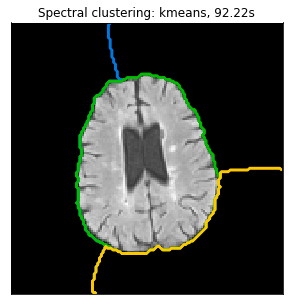

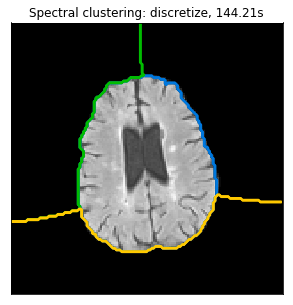

In [34]:
for assign_labels in ('kmeans', 'discretize'):
    t0 = time.time()
    labels = spectral_clustering(graph, n_clusters=N_REGIONS,
                                 assign_labels=assign_labels, random_state=1)
    t1 = time.time()
    labels = labels.reshape(img.shape)

    plt.figure(figsize=(5, 5))
    plt.imshow(img, cmap=plt.cm.gray)
    for l in range(N_REGIONS):
        plt.contour(labels == l, contours=1,
                    colors=[plt.cm.nipy_spectral(l / float(N_REGIONS))])
    plt.xticks(())
    plt.yticks(())
    title = 'Spectral clustering: %s, %.2fs' % (assign_labels, (t1 - t0))
    print(title)
    plt.title(title)
plt.show()

In [35]:
labels

array([[2, 2, 2, ..., 0, 0, 0],
       [2, 2, 2, ..., 0, 0, 0],
       [2, 2, 2, ..., 0, 0, 0],
       ...,
       [3, 3, 3, ..., 3, 3, 3],
       [3, 3, 3, ..., 3, 3, 3],
       [3, 3, 3, ..., 3, 3, 3]], dtype=int64)

C:\Users\Bipasha Roy\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  This is separate from the ipykernel package so we can avoid doing imports until


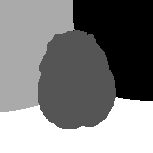

In [36]:
from numpy import array
from scipy.misc import toimage
imm=toimage(labels)
imm